In [174]:
#!pip install citipy

### Student: Angela Shane
#### Homework 06: WeatherPy

#### Analysis
* Observation 1
* Observation 2
* Observation 3

In [175]:
import json
import requests
import pandas as pd
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [176]:
cities_df = pd.DataFrame(columns=("city","country","lat","lng","temp","humidity","cloudiness","wind_speed"))

In [177]:
def getCoordinates():
   return uniform(-90, 90),uniform(-180,180)

#### Generate Random Cities

In [178]:
points = (getCoordinates() for x in range(10))
for idx, point in enumerate(points):
    city = citipy.nearest_city(point[0], point[1])
    #print(f"city: {city.city_name} country: {city.country_code}, coordinates: {point}")
    cities_df.loc[idx] = [city.city_name, city.country_code, point[0], point[1],'','','','']
cities_df.head(10)

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,port alfred,za,-65.085176,39.382394,,,,
1,port hedland,au,-25.344922,121.281325,,,,
2,rikitea,pf,-77.611720,-125.665932,,,,
3,port elizabeth,za,-54.981464,28.585009,,,,
4,kholtoson,ru,49.730985,101.793781,,,,
5,albany,au,-89.381032,94.654439,,,,
6,iqaluit,ca,62.923611,-73.321897,,,,
7,xinan,cn,34.060009,118.369180,,,,
8,atar,mr,19.606517,-10.280338,,,,
9,cape town,za,-56.101375,-3.159132,,,,


In [179]:
chart_date = datetime.now().strftime('%m/%d/%Y')
chart_date

'08/15/2017'

#### Call Weather API to retrieve weather information for each city

In [180]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
for idx, row in cities_df.iterrows():
    print("Now retrieving weather for #%s, city: %s" % ( idx, row['city']))
    query_url = url + "appid=" + api_key + "&lat=" + str(row["lat"]) + "&lon=" + str(row["lng"]) + "&units=imperial&mode=json"
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cities_df.set_value(idx,'temp',weather_json["main"]["temp"])
        cities_df.set_value(idx,'humidity',weather_json["main"]["humidity"])
        cities_df.set_value(idx,'cloudiness',weather_json["clouds"]["all"])
        cities_df.set_value(idx,'wind_speed',weather_json["wind"]["speed"])
    except:
        print("skipping city %s" % (row['city']))
cities_df.head(10)

Now retrieving weather for #0, city: port alfred
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-65.08517615703147&lon=39.38239419575427&units=imperial&mode=json
Now retrieving weather for #1, city: port hedland
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-25.344922416973816&lon=121.28132466437785&units=imperial&mode=json
Now retrieving weather for #2, city: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-77.61172019768658&lon=-125.6659319319227&units=imperial&mode=json
Now retrieving weather for #3, city: port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=-54.98146409998668&lon=28.585008732372387&units=imperial&mode=json
Now retrieving weather for #4, city: kholtoson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&lat=49.73098473647312&lon=101.7937805003076

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,port alfred,za,-65.085176,39.382394,2.65,92,44,38.63
1,port hedland,au,-25.344922,121.281325,44.05,58,0,9.78
2,rikitea,pf,-77.611720,-125.665932,-16.43,71,24,39.53
3,port elizabeth,za,-54.981464,28.585009,25.15,100,64,31.03
4,kholtoson,ru,49.730985,101.793781,54.94,99,92,2.51
5,albany,au,-89.381032,94.654439,-59.36,0,32,16.93
6,iqaluit,ca,62.923611,-73.321897,41.26,97,8,3.74
7,xinan,cn,34.060009,118.369180,72.13,96,80,2.73
8,atar,mr,19.606517,-10.280338,92.74,25,64,7.2
9,cape town,za,-56.101375,-3.159132,25.78,97,64,14.47


#### Output city weather information to csv

In [181]:
cities_df.to_csv('weather_cities.csv')

#### Generate series data for chart

In [182]:
axis_lat = []
axis_temp = []
axis_humd = []
axis_cloud = []
axis_wind = []

for idx, row in cities_df.iterrows():
    axis_lat.append(float(row["lat"]))
    axis_temp.append(float(row["temp"]))
    axis_humd.append(float(row["humidity"]))
    axis_cloud.append(float(row["cloudiness"]))
    axis_wind.append(float(row["wind_speed"]))


#### Chart city latitude versus temperature

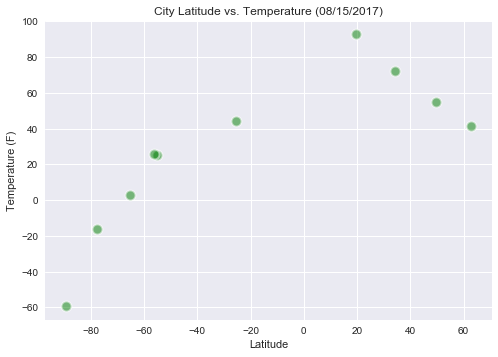

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_temp, marker="o",color="green",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Temperature (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
sns.set()
plt.savefig('lat_temp.png')
plt.show()

#### Chart city latitude versus humidity


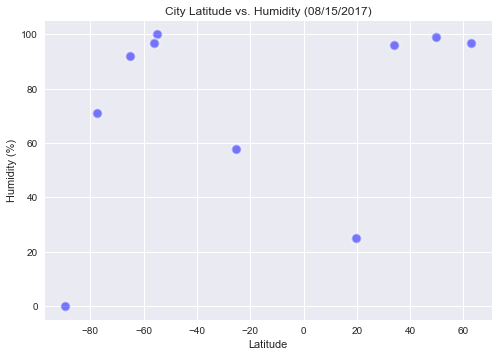

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat,axis_humd, marker="o",color="blue",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Humidity (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
sns.set()
plt.savefig('lat_humidity.png')
plt.show()

#### Chart city latitude versus cloudiness

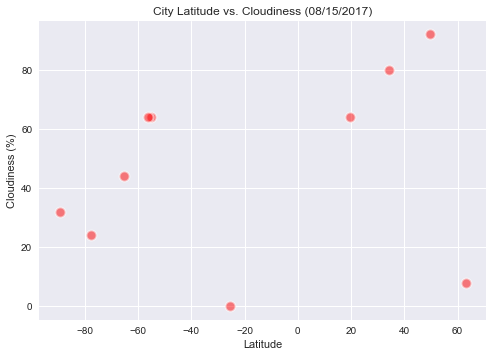

In [185]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_cloud, marker="o",color="red",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Cloudiness (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
sns.set()
plt.savefig('lat_cloud.png')
plt.show()

#### Chart city latitude versus wind speed

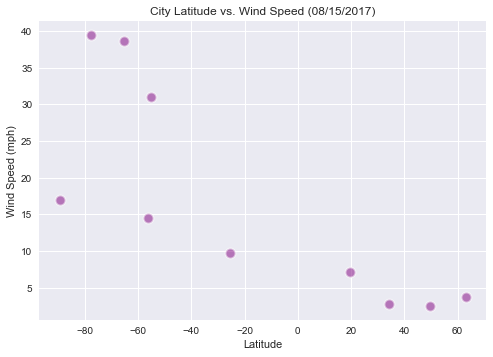

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter( axis_lat,axis_wind,marker="o",color="purple",s=100, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Wind Speed (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
sns.set()
plt.savefig('lat_wind.png')
plt.show()